# Cure Kinetics (28 points)

#### Apurv Rahul Kode (5717221); Michal Fedoroňko (5004527); Prajwal Jayaraman (5901324)

### As it was explained during the lectures, a significant part of research in composites manufacturing is involved in analyzing curing processes of thermoset polymers.Thermoset resins, such as epoxy, undergo a curing process driven by chemical reactions. These reactions result in the creation of covalent bonds among monomers, ultimately forming polymer chains. This curing process is quantified by the parameter known as the 'degree of cure,' denoted as $\alpha$. Initially, in the absence of any covalent bonds, the material consists solely of individual monomers. In this scenario, it can be asserted that no bonding has occurred, resulting in $\alpha = 0$. However, upon the addition of a hardener, the monomers initiate the formation of polymer chains through the establishment of covalent bonds. When all the monomers have become part of polymer chains through these covalent bonds, it is deemed that the degree of cure has reached its maximum, $\alpha = 1$

### Chemical reactions occur through contact of two active groups belonging to different molecules (for example of epoxy and of a hardener). Elevated cure temperatures are essential to trigger and maintain the chemical reactions responsible for converting the thermoset into a fully cured state. Whenever resin and hardener molecules (after mixing) are provided with more kinetic energy, they are more likely to shift and collide with neighbouring molecules, increasing the chances of curing reactions. Additionally, when more time is given to two reactants, the probability of a necessary collision for bonding increases. As a result, these phenomena are highly influenced by resin chemistry, catalyst reactivity, cure temperature, and the presence of inhibitors or accelerators.

### Therefore, we can say that the degree of cure $\alpha$ is a function of both temperature and time. $$\alpha = f(T,t)$$

#### Cure kinetics is concerned with the rates of the chemical reactions in a curing process. This is relevant, since the cure kinetics can help predict the thermoset cure and therefore also determines the manufacturing process and (partially) the final material properties. When cure kinetics are understood, they can be used to predict the degree of cure $\alpha$ of a certain process. To make this type of prediction, DSC measurement data can be used.

#### Before starting to work on the questions and to achieve a better understanding of the topic, it is highly recommended for you to read the paper provided with this notebook (Kailong Jin, William H. Heath, John M. Torkelson, Kinetics of multifunctional thiol-epoxy click reactions studied by differential scanning calorimetry: Effects of catalysis and functionality. Polymer. 2015; 81: 70-78).

### Question 1 (1 point)
#### Differential Scanning Calorimetry (DSC) experiments are frequently used to evaluate the cure kinetics parameters involved in the curing of thermosets. To show this correlation, three tests were performed in isothermal conditions for the polymerization of a thermoset at three different temperatures. The .txt files which contain these raw isothermal DSC measurements were attached to this notebook.
#### In the cell below, plot the relevant DSC measurement data for all of the three cases in a single figure. Don't forget to label the axis (ylabel = H[W/g], xlabel=t[min]).
#### NOTE: The unit used for heat flow data in the .txt files is [mW/s]

#### Data Cleaning and Assumptions:

The following measures have been taken in order to get precise results and values for further analysis:

1) Only the isothermal region was considered for the analysis.

2) All negative values have been excluded as they are not characteristic of polymer curing behaviour.

3) To obtain the values of heat generated from the given data, the data was multiplied by the ΔΔtime to obtain the heat generated and then divided by the weight of the specimen to get the heat generated per gram of sample.

4) All outliers were eliminated as they, too, are uncharacteristic of polymer behaviour and are assumed to be inaccuracies from the DSC measurement of unknown origin.

5) It was observed that a large part of the asymptote of the heat generation curve was approaching a value below zero. This resulted in the calculated final cure values being much lower than expected. This was assumed to be a miscalibration during measurement. To correct this, the dataset was offset to approach zero instead to calculate more appropriate values of the final cure.

6) After eliminating all outliers and negative values, all datasets were normalised to start from t=0 with the same time interval obtained from the DSC data.

In [36]:
#import packages here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
from scipy.optimize import Bounds
from scipy.integrate import cumtrapz

In [37]:
data = pd.read_excel('Graph_CureKinetics.xlsx')
t180 = data.iloc[:14339, 0]
H180 = data.iloc[:14339, 1]
t150 = data.iloc[:19105, 2]
H150 = data.iloc[:19105, 3]
t120 = data.iloc[:19105, 4]
H120 = data.iloc[:19105, 5]

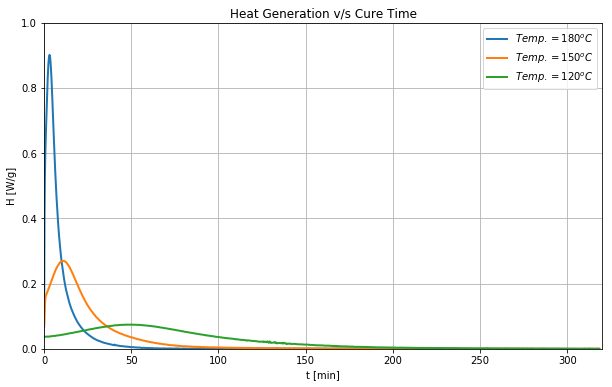

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(t180, H180, label='$Temp. = 180^oC$', linewidth=2)
plt.plot(t150, H150, label='$Temp. = 150^oC$', linewidth=2)
plt.plot(t120, H120, label='$Temp. = 120^oC$', linewidth=2)
plt.legend()
plt.ylabel('H [W/g]')
plt.xlabel('t [min]')
plt.xlim([0, 320])
plt.ylim([0, 1])
plt.title('Heat Generation v/s Cure Time')
plt.savefig('Hmax.png')
plt.grid()
plt.show()

### Question 2 (2 points)
#### After visualizing the heat generation curves, explain why and how isothermal DSC measurement data can be related to the curing rate of a thermoset resin. Why is there a peak and what can it be related to?

#### Answer: 
The amount of heat released in time t at a constant curing temperature can be related to the cure rate by using the slope of the graph and the area under the curve as it gives a relation between the total heat released in the reaction and the rate of heat generation. As curing is an exothermic process, heat generation can be used to estimate the cure rate and degree of cure. The peak represents the exothermic reaction occurring during curing. Once curing reaches a steady rate, the peak drops. The peak indicates 10-40% of the cure based on the curing temperature and duration.

#### As mentioned, the just plotted isothermal DSC data  can be used to obtain an estimation of degree of cure $\alpha$ vs. time $t$. To do so, it first has to be assumed that the heat flow is proportional to the degree of cure.  $$\Delta H_{max} \equiv \alpha = 1$$
#### Where  $\Delta H_{max} $ identifies the maximum total heat of reaction found for the three DSC measurements.
#### Overall, the formula above expresses how the total generated heat flow while curing corresponds to a complete degree of cure for the reaction (100%).
#### Then, this assumption is used to normalize the heat flow measurement. This normalized heat flow can now be related to the curing rate. $$\frac{d\alpha}{dt} = \frac{1}{\Delta H{max}} \frac{dH(t)}{dt}$$
#### Finally, integrating this result leads to the relationship of the degree of cure $\alpha$ vs. time $t$.

### Question 3 (4 points)
#### Use the assumptions and information provided above to plot the degree of cure $\alpha$ vs. time $t$, using the provided data. Plot all cases in a single figure. Make sure to plot over a time interval which suits the results, include a legend and axes labels with units.

#### Data Cleaning and Assumptions:

The following measures have been taken in order to get precise results and values for further analysis:

1) Only the isothermal region was considered for the analysis.

2) All negative values have been excluded as they are not characteristic of polymer curing behaviour.

3) All outliers were eliminated as they, too, are uncharacteristic of polymer behaviour and are assumed to be inaccuracies from the DSC measurement of unknown origin.

4) It was observed that a large part of the asymptote of the heat generation curve was approaching a value below zero. This resulted in the calculated final cure values being much lower than expected. This was assumed to be a miscalibration during measurement. To correct this, the dataset was offset to approach zero instead to calculate more appropriate values of the final cure.

5) The highest value of $H_{max}$ obtained from the 3 datasets was used as the final $H_{max}$ alongwith the cleaned values obtained from the text files $\frac{dh}{dt}$ were used to calculate the degree of cure.

6) The final obtained values were also normalised using the weight of the specimen.

7) After eliminating all outliers and negative values, all datasets were normalised to start from t=0 with the same time interval obtained from the DSC data.

In [39]:
data2 = pd.read_excel('Graph_CureKinetics_Raw.xlsx')
t1180 = data2.iloc[:14340, 0]
dhdt180 = data2.iloc[:14340, 1]
t1150 = data2.iloc[:19105, 2]
dhdt150 = data2.iloc[:19105, 3]
t1120 = data2.iloc[:19105, 4]
dhdt120 = data2.iloc[:19105, 5]

In [40]:
A180 = np.trapz(H180, t180 * 60)
A150 = np.trapz(H150, t150 * 60)
A120 = np.trapz(H120, t120 * 60)
hmax = max(A180, A150, A120)

In [41]:
dadt180 = dhdt180 / (hmax*14.4)
dadt150 = dhdt150 / (hmax*10.4)
dadt120 = dhdt120 / (hmax*13.7)

In [42]:
alpha180 = pd.Series(index=range(len(dadt180)))
alpha180.iloc[0] = 0
for i in range(1, len(dadt180)):
    alpha180.iloc[i] = alpha180.iloc[i-1] + dadt180.iloc[i-1]

In [43]:
alpha150 = pd.Series(index=range(len(dadt150)))
alpha150.iloc[0] = 0
for i in range(1, len(dadt150)):
    alpha150.iloc[i] = alpha150.iloc[i-1] + dadt150.iloc[i-1]

In [44]:
alpha120 = pd.Series(index=range(len(dadt120)))
alpha120.iloc[0] = 0
for i in range(1, len(dadt120)):
    alpha120.iloc[i] = alpha120.iloc[i-1] + dadt120.iloc[i-1]

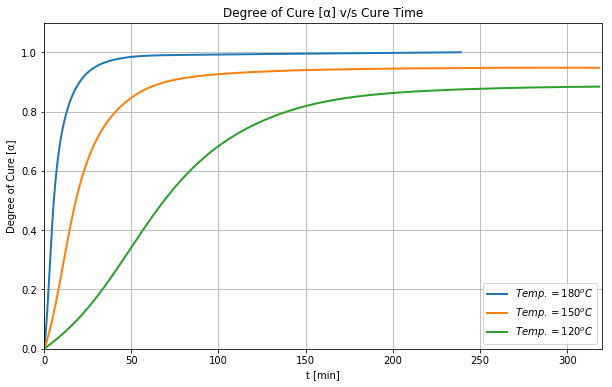

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(t1180, alpha180, label='$Temp. = 180^oC$', linewidth=2)
plt.plot(t1150, alpha150, label='$Temp. = 150^oC$', linewidth=2)
plt.plot(t1120, alpha120, label='$Temp. = 120^oC$', linewidth=2)
plt.legend()
plt.ylabel('Degree of Cure [α]')
plt.xlabel('t [min]')
plt.title('Degree of Cure [α] v/s Cure Time')
plt.xlim([0, 320])
plt.ylim([0, 1.1])
plt.savefig('Alpha.png')
plt.grid()
plt.show()

### Question 4 (4 points)

#### Question 4.1: In the previous question you have generated graphs illustrating the relationship between the degree of cure $\alpha$ and time t for three isothermal DSC measurements carried out at different temperatures. Provide your analysis regarding the maximum degree of cure visible in the generated graphs. Can you explain the correlation between the final degree of cure and cure temperature? 

#### Answer: 
The curve of the degree of cure at $180^oC$ is seen to achieve the highest cure. This indicates that sufficient cure time was given at the set temperature. The final degree of cure is observed to drop for the set cure duration as the isothermal cure temperature reduces. This implies that more time is needed at lower cure temperatures for a complete cure.

#### Question 4.2 : A graph correlating degree of cure $\alpha$, sometimes also called conversion, and cure time for DSC isothermal scans of an epoxy-amine system is reported below. Conversions of the system cured at six different temperatures for 166 hours are shown.
#### Use this data to compare your graph from question 3 and the given one. You may highlight similarities and provide your reasons for any possible relevant difference.

Conversion vs. ln(time) curves for an epoxy-amine system. From Wisanrakkit and Gillham, J. Appl. Poly. Sci. 42, 2453 (1991)
<img src="Conversion-time-plot.jpg" width="700" height="400">

#### Answer:
The trends shown in the above figure match our plots. Both show a lower cure time for higher isothermal cure temperatures. One noted difference is the starting value of $\alpha$ for the higher cure temperatures. This could be because our data set has been modified to exclude negative values obtained from the DSC, and the time values for all datasets have been made uniform, irrespective of the point till which the negative values have been eliminated.

#### Several cure kinetics models were formulated to predict and simulate experimental cure profiles of thermosetting resins in terms of curing rate. You will be putting to test one of the most widely used ones: the Kamal-Sourour model (shown below) $$\frac{d\alpha}{dt} = (k_1 + k_2 \cdot \alpha^m)(1 - \alpha)^n$$
#### Where $k_1$ and $k_2$ are rate constants, and  $m$ and $n$ are reaction orders.
#### The reaction rate constants $k_1$ and $k_2$ strongly depend on cure temperature and follow an Arrhenius type relation, as shown by the equation:
$$k_i = A_i \cdot exp(-\frac{E_i}{RT})$$
$$i=1,2$$
#### Where the pre-exponential factor $A_i$ represents a constant, $E_i$ is the activation energy (mol/J), R is the molar gas constant and T is the cure temperature.

### Question 5 (7 points)
#### Question 5.1: Using the experimental isothermal DSC data (already used in question 1) for curing at 180°C and 120°C, estimate the parameters of the Kamal model ($k_1$, $k_2$, $m$, $n$, $E_i$, $A_i$) and report them below. After obtaining these parameters, use them to create plots of conversion rate $d\alpha/dt$ vs. degree of conversion $\alpha$ for these two cure temperatures.  Compare these curves with the experimental results of $d\alpha/dt$ vs. $\alpha$.
#### Tip: Parameters can be estimated by: 1. making an initial guess of the parameters. 2. Minimizing the sum of squared errors between guess and data (fit to data), where $m, n, E_1, E_2, A_1, A_2$ should be the same for the two datasets.

In [55]:
#Re-initialize data
dadt180 = np.asarray(dadt180[:14000])
dadt150 = np.asarray(dadt150[:14000])
dadt120 = np.asarray(dadt120[:14000])
alpha180 = np.asarray(alpha180[:14000])
alpha150 = np.asarray(alpha150[:14000])
alpha120 = np.asarray(alpha120[:14000])

In [56]:
def arrhenius(E,A,T):
    R = 8.314 
    k = A*np.exp(-E/(R*T))
    return k

def kamal(x0, alpha, T): 
    k1 = arrhenius(x0[0], x0[2], T)
    k2 = arrhenius(x0[1], x0[3], T)
    dadt = (k1 + k2 * alpha**x0[4]) * (1 - alpha)**x0[5]
    return dadt

def errordiff(x0, alpha180, dadt180, alpha120, dadt120):
    return kamal(x0, alpha180, 453) + kamal(x0, alpha120, 393) - (dadt180 + dadt120)

In [57]:
# Initial guess
E1 = 50000 
E2 = 50000 
A1 = 1.25*10**6
A2 = 1.25*10**6
m = 1
n = 2
x0 = [E1, E2, A1, A2, m, n]

xopt = least_squares(errordiff, x0, args=(alpha180, dadt180, alpha120, dadt120)).x

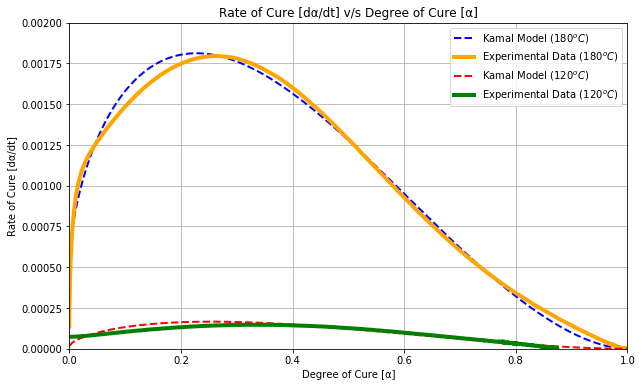

In [58]:
# Plot
alphaval = np.linspace(0,1,200)
plt.figure(figsize=(10, 6))
plt.plot(alphaval, kamal(xopt, alphaval, 453), '--', label = 'Kamal Model ($180^oC$)', linewidth=2, color='blue')
plt.plot(alpha180, dadt180, label='Experimental Data ($180^oC$)', linewidth=4, color='orange')
plt.plot(alphaval, kamal(xopt, alphaval, 393), '--', label = 'Kamal Model ($120^oC$)', linewidth=2, color='red')
plt.plot(alpha120, dadt120, label='Experimental Data ($120^oC$)', linewidth=4, color='green')
plt.ylabel('Rate of Cure [dα/dt]')
plt.xlabel('Degree of Cure [α]')
plt.title('Rate of Cure [dα/dt] v/s Degree of Cure [α]')
plt.xlim([0, 1])
plt.ylim([0, 0.002])
plt.grid()
plt.legend()
plt.savefig('KamalModel.png')
plt.show()

#### The model with your estimated parameters ($m, n, k_1, k_2, A_1, A_2$) that you have created in Question 5.1 should be a model that describes the cure behaviour of the resin system at different temperatures. To check whether that is the case, you will be using your model for a 150°C cure temperature. 

#### Question 5.2: The goal now is to validate the parameters you found in question 5.1 ($m, n, k_1, k_2, A_1, A_2$) by applying the Kamal model to a third cure temperature (150°C).
#### Therefore, plot in a single graph the conversion rate $d\alpha/dt$ vs. degree of conversion $\alpha$:
#### - from the DSC experimental data for the three cure temperatures provided in Question 1 provided in the spreadsheet
#### - from the Kamal model, using parameters estimated in 5.1 (for all three cure temperatures)
#### Finally, comment on the plot you obtained for 150°C based on your model compared to the experimental data. Also comment on the validity and accuracy of your model. 

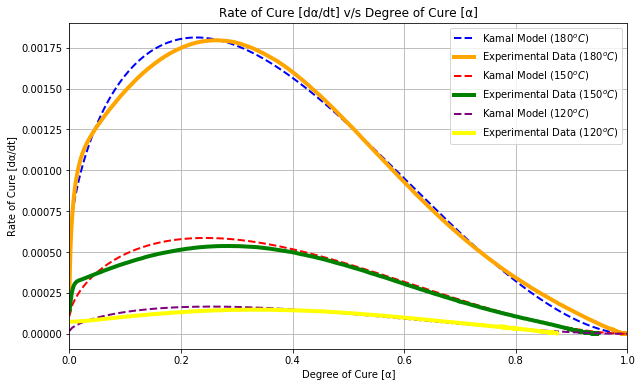

In [59]:
plt.figure(figsize=(10, 6))
plt.plot(alphaval, kamal(xopt, alphaval, 453), '--', label = 'Kamal Model ($180^oC$)', linewidth=2, color='blue')
plt.plot(alpha180, dadt180, label='Experimental Data ($180^oC$)', linewidth=4, color='orange')
plt.plot(alphaval, kamal(xopt, alphaval, 423), '--', label = 'Kamal Model ($150^oC$)', linewidth=2, color='red')
plt.plot(alpha150, dadt150, label='Experimental Data ($150^oC$)', linewidth=4, color='green')
plt.plot(alphaval, kamal(xopt, alphaval, 393), '--', label = 'Kamal Model ($120^oC$)', linewidth=2, color='purple')
plt.plot(alpha120, dadt120, label='Experimental Data ($120^oC$)', linewidth=4, color='yellow')
plt.ylabel('Rate of Cure [dα/dt]')
plt.xlabel('Degree of Cure [α]')
plt.title('Rate of Cure [dα/dt] v/s Degree of Cure [α]')
plt.xlim([0, 1])
#plt.ylim([0, 0.0006])
plt.grid()
plt.legend()
plt.savefig('150Fit.png')
plt.show()

#### Comment:

The above figure shows that the Kamal Model provides a good fit for the data at $150^oC$. However, slight variations in the plots are noted that can be attributed to the irregularities in testing conditions. Another fact that needs to be considered is that the datasets at $180^oC$ and $120^oC$ were used to create the best fit for the model. Therefore, the Kamal Model parameters could cause minor variations for other cure temperatures. 

#### Question 5.3: In order to verify one of the parameters you found, plot in a single graph $ln(d\alpha/dt)$ vs. 1/T for different degrees of cure $\alpha$ of the three DSC measurements. Comment on the obtained graph and on the activation energy of the epoxy system.
#### Hint: The plot should confirm the Arrhenius type relation existing between $\frac{E}{RT}$ and $ln(d\alpha/dt)$

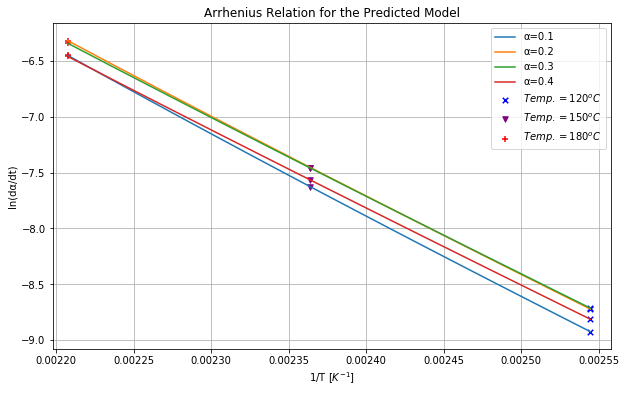

In [68]:
T = np.linspace(393, 453, 100)
T2 = np.linspace(393, 453, 3)
invT = 1/T
invT2 = 1/T2
alpha = np.array([0.1, 0.2, 0.3, 0.4])

plt.figure(figsize=(10, 6))
plt.plot(invT, np.log(kamal(xopt, 0.1, T)), label='α=0.1', linewidth=1.5)
plt.plot(invT, np.log(kamal(xopt, 0.2, T)), label='α=0.2', linewidth=1.5)
plt.plot(invT, np.log(kamal(xopt, 0.3, T)), label='α=0.3', linewidth=1.5)
plt.plot(invT, np.log(kamal(xopt, 0.4, T)), label='α=0.4', linewidth=1.5)
plt.scatter([1/393]*4, np.log(kamal(xopt, alpha, 393)), label='$Temp. = 120^oC$', marker='x', color = 'blue', s = 30)
plt.scatter([1/423]*4, np.log(kamal(xopt, alpha, 423)), label='$Temp. = 150^oC$', marker='v', color = 'purple', s = 30)
plt.scatter([1/453]*4, np.log(kamal(xopt, alpha, 453)), label='$Temp. = 180^oC$', marker='+', color = 'red', s = 30)
plt.ylabel('ln(dα/dt)')
plt.xlabel('1/T [$K^{-1}$]')
plt.title('Arrhenius Relation for the Predicted Model')
plt.xlim([1/455, 1/391])
plt.legend()
plt.grid()
plt.savefig('Arrhenius.png')
plt.show()

In [86]:
slope, intercept = np.polyfit(invT, np.log(kamal(xopt, 0.2, T)), 1)
print(f"Activation Energy for the Epoxy System: {round((-slope*8.314),2)} J/mol")
AF = np.exp(intercept)
print(f"Pre-Exponential Constant for the Epoxy System: {round(AF,2)} 1/s")

Activation Energy for the Epoxy System: 59263.22 J/mol
Pre-Exponential Constant for the Epoxy System: 12132.76 1/s


#### Comment:

The plotted graph depicts a Arrhenius relation between the natural log of the cure rate and the inverse of cure temperature. It implies a linear relation between the rate constant $k$ and $1/T$. The Kamal Model can also be written as:

<center>$d\alpha/dt = k(T)f(\alpha)$</center>

As we are considering constant $\alpha$ values for the above plot, the above graph is a relation between temperature and rate constant. As the cure temperature increases, the rate constant increases due to a decrease in the power term in $e^{-E/RT}$. 

For the same cure temperature, we see a lower cure rate for a higher degree of cure (from 0.2-0.4). This can be attributed to the fact that the number of crosslinks formed increases as the reaction continues. Increasing crosslinks limits individual monomers' mobility, reducing the curing rate as the degree of cure progresses.

Additionally, we observe that at $\alpha$ of 0.1, the cure rate is lower than 0.2-0.3, while $\alpha=0.4$ has a cure rate lower than 0.2-0.3 and higher than 0.1. This response matches what we observe in the graph obtained from the Kamal Model in \textit{Question 5.2}. We see a peak in cure rate at  $\alpha=0.2-0.3$.

Activation energy of a epoxy system refers to the energy required in order to initiate the curing reaction in the system. At lower cure temperatures, the time taken to cross the energy barrier is longer than at higher cure temperatures. This leads to a lower cure rate.

#### As mentioned at the beginning of this Notebook, thermoset polymers undergo a curing cycle to achieve hardening. This process involves the formation of covalent bonds between monomers, ultimately resulting in the creation of the polymer network. The amount of formed bonds, therefore the degree of cross-linking, directly impacts the glass transition temperature (Tg) of the material. In the initial stages of the curing cycle, when relatively few bonds or crosslinks have formed, the material exhibits a relatively low Tg. However, as the degree of cure increases, the Tg of the material increases. 

#### The correlation between Tg and the degree of cure is particularly crucial in the design and engineering of polymer-based products, as it allows for the precise tuning of material properties by controlling the curing parameters. By adjusting the degree of cross-linking through cure temperature and time, engineers can achieve specific material characteristics, such as stiffness, strength, resistance to heat, and dimensional stability, tailored to the requirements of a particular application.

### Question 6 (2 points)

#### Describe the glass transition temperature and explain what happens (on a microscale and chemical level) when a material transitions through this value. Please include an explanation on how this value depends on  the degree of cure.

#### Answer: 

As the thermoset polymers cure, the value of the glass transition temperature for the polymer increases due to the formation of cross-links and bonds in the polymer chain. This increasing cross-link causes an increase in the molecular weight of the polymer and an increase in viscosity. The resin then transitions from a liquid state to a rubbery state.

Once the value of glass-transition temperature reaches the value of cure temperature, it causes a transition of the polymer from a rubbery state to a gelled glassy state.

Referring to the Time-Temperature-Transformation diagram by Gillham and Enns, if the cure temperature were to be lower than the $T_{g0}$ of the reactants, we would never get curing, and the polymer would remain in an ungelled glassy state.
When the cure temperature is higher than the $_{Gel}T_{g}$, the reactions can occur due to the mobility of molecules. Therefore, gelation occurs before the vitrification of the polymer, allowing a complete cure. However, the higher the cure temperature ($_{Gel}T_{g}$ < $T_{cure}$ < $T_{g\infty}$), the faster the conversion into a gelled rubber state, preventing further infusion of resin. At temperatures higher than $T_{g\infty}$, degradation and charring of the resin system occurs.

#### For a thermosetting polymer, it is particularly relevant to have a model able to describe the physical changes encountered during the cure cycle.
#### The following empirical relation (Di Benedetto equation) between glass transition temperature $T_g$ and conversion $\alpha$ has this goal and identifies the vitrification limit of a polymer:
####  $$ \frac{T_g - T_{g0}}{T_{g\infty} - T_{g0}} =  \frac{\lambda \alpha}{1 - (1 - \lambda)\alpha}  $$

#### In which $\lambda = \frac{\Delta C_p}{\Delta C_{p0}}$ is the ratio of the heat capacities of the fully reacted system and the initial system (therefore $\lambda < 1$), $T_{g\infty}$ is the Tg of the fully reacted system, and $T_{g0}$ is the Tg of the initial system.

### Question 7 (2 points)

#### A dataset containing glass transition temperature $T_g$ and degree of cure $\alpha$ values for Airstone 780E was provided with this notebook.
#### Use the $T_{g}$ values to fit the model to the experimental data, find $\lambda$ and report its value below.
#### Generate a graph for the glass transition temperature $T_g$ vs. degree of cure $\alpha$ to compare experimental values with the analytical model.

#### NOTE: $T_{g0}$ = -54.577, $T_{g\infty}$ = 88.853,

In [17]:
# Initalize Data
Tg0 = -54.577
Tg_inf = 88.853

tgdata = pd.read_excel('TG_Data.xlsx')
alphatg = tgdata.iloc[:, 0]
tg = tgdata.iloc[:, 1]

In [18]:
def diben(alpha, lambdaval):
    return Tg0 + (((Tg_inf - Tg0) * lambdaval * alpha) / ((1 - (1 - lambdaval) * alpha)))

def lambdiff(lambdaa, alphatg, tg):
    return diben(alphatg, lambdaa) - tg

In [19]:
lambopt = least_squares(lambdiff, 1, args=(alphatg, tg)).x
lambdaval = lambopt[0]
print(f"Lambda (λ) value: {round(lambdaval,2)}")

Lambda (λ) value: 0.52


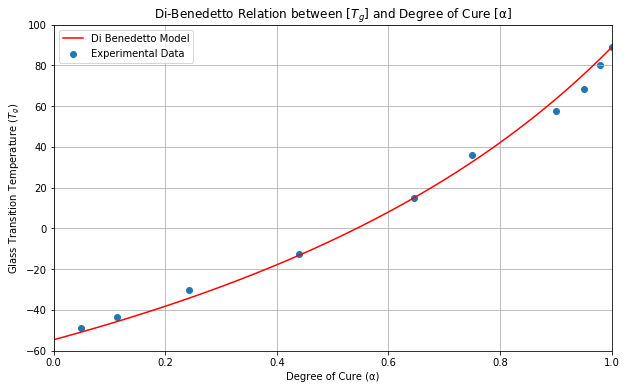

In [20]:
alpharange = np.linspace(0, 1, 100)
Tg_model = diben(alpharange, lambdaval)
plt.figure(figsize=(10, 6))
plt.scatter(alphatg, tg, label='Experimental Data')
plt.plot(alpharange, Tg_model, label='Di Benedetto Model', color='red')
plt.xlabel('Degree of Cure (α)')
plt.ylabel('Glass Transition Temperature ($T_g$)')
plt.title('Di-Benedetto Relation between [$T_g$] and Degree of Cure [α]')
plt.xlim([0, 1])
plt.ylim([-60, 100])
plt.legend()
plt.grid()
plt.savefig('DiBenedetto.png')
plt.show()

#### The glass transition temperature is specifically relevant when trying to establish a range of temperatures over which a polymer is able to retain its mechanical properties. This range is commonly identified as "Service temperature" and in these conditions the polymer can perform its intended function without experiencing significant degradation or detrimental changes in its properties.

### Question 8 (2 points)
#### Two composite parts (A and B) have been previously manufactured by infusion using Airstone 780E, cured isothermally at 80°C. It is known that the reached degree of cure at the end of the cycle for part A is $\alpha$= 0.9, while part B was consolidated up to $\alpha$= 1.
#### Use the DiBenedetto equation and the parameters given in question 7 to obtain the glass transition temperatures Tg for the two parts. Please, comment on the obtained values in relation to the service temperatures for these parts.

In [21]:
TgA = Tg0 + (((Tg_inf - Tg0) * lambdaval * 0.9) / ((1 - (1 - lambdaval) * 0.9)))
print(f"Glass Transition Temperature for A: {round(TgA,2)}°C")
TgB = Tg0 + (((Tg_inf - Tg0) * lambdaval * 1) / ((1 - (1 - lambdaval) * 1)))
print(f"Glass Transition Temperature for B: {round(TgB,2)}°C")

Glass Transition Temperature for A: 63.49°C
Glass Transition Temperature for B: 88.85°C


#### Comment:

When talking about service temperatures, glass transition temperature plays a vital role. At this temperature, polymers see a drastic reduction in mechanical properties, and the polymer turns from a glassy state to a rubbery state.

Based on the calculated values for parts A and B based on their degree of cure, it can be seen that part A will see a reduction in mechanical properties before part B as it has a lower glass transition temperature.

### Question 9 (4 points)
#### The cure kinetics model applicable to Airstone A780 is known and given below:
#### $$\frac{d\alpha}{dt} = \frac{A \cdot exp(-\frac{E}{RT})}{1+exp(C(\alpha - \alpha_{c} -\alpha_{T}T)) }(1 - \alpha)^n\cdot \alpha^m$$
#### Where:
#### A = 681085 1/s
#### E = 59291 J/mol
#### n = 1.67
#### m = 0.12
#### C = 47.7
#### $\alpha_{c}$= 0.77
#### $\alpha_{T}$ = 0.0016


#### You are now required to use the provided equation model to improve the cure cycle selected for these parts.
#### Question 9.1: Using the cure kinetics model and the curing rate, now please calculate what was the curing time for part A (up to  $\alpha$= 0.9) and what additional curing time would be necessary to obtain the highest possible glass transition temperature. Why is this consideration necessary in terms of both processing and service temperatures?



#### Additional Considerations:

Given the nature of the cure model used to model the cure rate for Airstone A780, a minimum cure of 0.0001 and a maximum cure of 0.9999 were used. Using a minimum and maximum of 0 and 1 would lead to an infinite cure rate due to the presence of the (1-$\alpha$) and $\alpha$ terms in the equation.

In [22]:
def curemodel(alphaval, TC):
    A = 681085
    E = 59291 
    n = 1.67
    m = 0.12
    C = 47.7
    alphac = 0.77
    alphat = 0.0016
    alpha = 0.9
    R = 8.314
    T = TC +273
    k = A * np.exp(-E/(R*T))
    x = np.exp(C*(alphaval - alphac - (alphat*T)))
    a1 = (1-alphaval)**n
    dadtAir = (k*a1*(alphaval**m))/(1+x)
    dadtAir = 1/dadtAir
    return dadtAir

In [23]:
n1 = 0.0001
n2 = 0.9
n3 = 0.9999
dn12 = round((n2-n1)*10000)
dn23 = round((n3-n2)*10000)
dn31 = round((n3-n1)*10000)

In [24]:
alphaval = np.linspace(n1,n2,dn12)
time1 = cumtrapz(curemodel(alphaval[:], 80), alphaval[:], initial=0)
time09 = time1[-1]/(60*60)
print(f"Cure Time for α = 0 to 0.9: {round(time09, 2)} hrs")

Cure Time for α = 0 to 0.9: 1.41 hrs


In [25]:
alphaval2 = np.linspace(n2,n3,dn23)
time2 = cumtrapz(curemodel(alphaval2[:], 80), alphaval2[:], initial=time09)
time209 = time2[-1]/(60*60)
print(f"Additional Cure Time for α = 0.9 to 1: {round(time209, 2)} hrs")

Additional Cure Time for α = 0.9 to 1: 185.8 hrs


In [26]:
alphaval3 = np.linspace(n1,n3,dn31)
time3 = cumtrapz(curemodel(alphaval3[:], 80), alphaval3[:], initial=0)
time309 = time3[-1]/(60*60)
print(f"Cure Time for α = 0 to 1: {round(time309, 2)} hrs")

Cure Time for α = 0 to 1: 187.18 hrs


#### Further Considerations:

After calculating the different cure times using the method described above, it can be seen that the cure time for the maximum degree of cure increases exponentially (approx. 8 days), which can be considered an unreasonably high cure time.

Furthermore, upon changing the accuracy of the $\alpha$ range values, the calculated value of time increased by a large margin. This led to the conclusion that the above method was unreliable in generating an accurate value of cure time for maximum cure.

A modified approach was therefore taken. The cure time was calculated for $\alpha$ values ranging from 0.9 to 0.99. This data was then used to generate a best-fitting equation to obtain a more accurate value for cure time. An iterative approach was taken to arrive at the final value. The degree of the polynomial was varied, and the error between consecutive values was calculated. The final cure time was obtained once the error was below an acceptable limit.

In [27]:
timevals = []
alpharange = np.arange(0.9, 1.0, 0.01)
for i in alpharange:
    n11 = 0.0001
    n22 = i
    dn122 = int(round(((n22-n11)*10000)))
    alphavalue = np.linspace(n11,n22,dn122)
    time = cumtrapz(curemodel(alphavalue[:], 80), alphavalue[:], initial=0)
    timevals.append(time[-1]/(60*60))

In [28]:
error = 0.1
base = 0
degree = 1
while True:
    extrapol = np.polyfit(alpharange, timevals, degree)
    max_cure = 1
    max_time = np.polyval(extrapol, max_cure)
    diff = abs((max_time - base) / max_time)
    if diff <= error:
        base = max_time
        break
    degree += 1
    base = max_time    

print(f"Cure Time for α = 0 to 1: {round(base, 2)} hrs")
print(f"Additional Cure Time for α = 0.9 to 1: {round((base-time09), 2)} hrs")

Cure Time for α = 0 to 1: 14.65 hrs
Additional Cure Time for α = 0.9 to 1: 13.25 hrs


#### Reflection:

As observed through the Di-Benedetto equation in \textit{Question 8}, an increase of 0.1 degrees of cure can lead to an increase in $T_g$ of almost $25^oC$. This helps significantly improve the service temperature and lifetime of polymer parts.

An essential factor to keep in mind to achieve the highest $T_g$ is the $T_{g\infty}$ of the part. Curing the part at temperatures above the $T_{g\infty}$ for longer durations will lead to charring and degradation of the resin. Therefore, a balance must be maintained between achieving the highest $T_g$ and avoiding degradation of the polymer system. 
In the given case, the cure temperature is lower than the $T_{g\infty}$ of the part. It cures relatively rapidly (~2 hrs) until the $T_g$ of the system matches the cure temperature, as explained in \textit{Question 6}. However, further cure from 0.9 to 1 takes much longer time as seen in the above calculations.

#### Question 9.2: The production team needs to speed up the production cycle of these parts. One way of achieving that would be to change the cure temperature. Plot a Figure to show the cure time needed for different cure temperatures to reach a degree of cure of 0.9 and 1. Comment on which cure temperature & cure time you would suggest to the production team and why (in your answer also think about the different implications a chosen cure temperature might have during the cure cycle and on the final product). 

In [29]:
timep11 = []
timep22 = []
for i in range(0, 400):
    timep1 = cumtrapz(curemodel(alphaval[:], i), alphaval[:], initial=0)
    timep2 = cumtrapz(curemodel(alphaval3[:], i), alphaval3[:], initial=0)
    timep11.append(timep1[-1]/(60*60))
    timep22.append(timep2[-1]/(60*60))

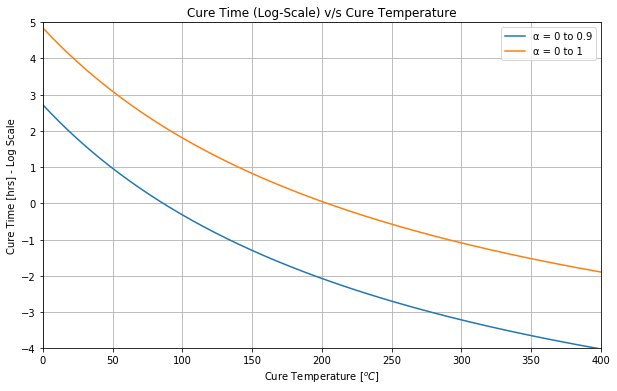

In [30]:
Tempval = np.linspace(0, 400, 400)
plt.figure(figsize=(10, 6))
plt.plot(Tempval, np.log10(timep11), label='α = 0 to 0.9')
plt.plot(Tempval, np.log10(timep22), label='α = 0 to 1')
plt.xlabel('Cure Temperature [$^oC$]')
plt.ylabel('Cure Time [hrs] - Log Scale')
plt.title('Cure Time (Log-Scale) v/s Cure Temperature')
plt.xlim([0, 400])
plt.ylim([-4, 5])
plt.legend()
plt.grid()
plt.savefig('Curetime.png')
plt.show()

#### Comment:

Based on the data obtained from the given Excel sheet, the $T_{g\infty}$ of $88.85^oC$ is the highest $T_g$ that can be obtained by the composite and, therefore must be kept in mind before designing the cure cycle. In order to enable the polymer to achieve the maximum $T_g$, the chosen cure temperature must be higher than the $T_{g\infty}$. Additionally, while keeping the cure temperature higher than $88.85^oC$, the time must be chosen in such a way as to avoid charring and degradation of the resin.

Therefore, a cure temperature in the range of $ 100^oC $ to $ 200^oC $ is appropriate for the following epoxy system as it considers all the above factors. As seen in the graph, once the cure temperature crosses $200^oC$, the cure time drops below 1 hour, indicating a very rapid cure, which could pose the risk of burning the resin.